In [1]:
import pandas as pd
import numpy as np
import os

Ucitavanje baze, podela na trening, test i validacioni skup, skaliranje i primena PCA algoritma.

In [2]:
pd.set_option('display.max_columns', 600)

In [3]:
database = pd.read_csv('celaBazaPosleEpiMut.csv', sep=',', header=0)

In [4]:
database

Gene name variation  alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0          MTOR    M1083V                                          14.742968    
1          MTOR    A1134V                                          -6.753854    
2          AKT1     V167A                                           4.318244    
3        MAP2K1     A366G                                          -8.043543    
4        MAP2K1     G392S                                          -9.852562    
...         ...       ...                                                ...    
95894     NT5C2     R195Q                                          -0.248485    
95895     NT5C2     G355E                                           9.329554    
95896     NT5C2      M53R                                           3.432416    
95897     NT5C2     G273W                                          -8.458504    
95898     NT5C2     S251R                                           2.116767    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                       -33.311483   
1                                       -54.468830   
2                                        27.903090   
3                                         9.511877   
4                                         1.481990   
...                                            ...   
95894                                   -45.966315   
95895                                   -32.979865   
95896                                    16.042263   
95897                                   194.497802   
95898                                   -45.342221   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                             591.554818          
1                                             -23.158126          
2                                              -5.784182          
3                                              65.541026          
4                                              24.888312          
...                                                  ...          
95894                                          54.832550          
95895                                          44.546857          
95896                                          75.554689          
95897                                          30.518072          
95898                                          89.195976          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                             605.156577              
1                                             -92.762155              
2                                             -20.847024              
3                                              83.522085              
4                                               8.298248              
...                                                  ...              
95894                                          -4.802087              
95895                                          -3.918395              
95896                                         169.641178              
95897                                         -38.450264              
95898                                          32.758690              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                               5.875901                
1                                               9.222564                
2                                               5.140362                
3                                              -6.650271                
4                                               0.000000                
...                                                  ...                
95894                                          -0.936179                
95895                                           8.448055                
95896                                          -7.590063             

In [4]:
database.describe()

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
count                                       95899.000000    
mean                                            0.698141    
std                                            15.617005    
min                                          -225.515870    
25%                                            -3.979647    
50%                                             0.000000    
75%                                             5.271487    
max                                           233.716377    

       Hydrophobicity index (Argos et al., 1982) 1  \
count                                 95899.000000   
mean                                      7.893816   
std                                     151.795453   
min                                   -1405.775472   
25%                                     -52.398052   
50%                                       0.916813   
75%                                      65.737574   
max                                    1819.713963   

       Signal sequence helical potential (Argos et al., 1982) 1  \
count                                       95899.000000          
mean                                            6.919372          
std                                           180.022927          
min                                         -1507.604710          
25%                                           -44.257530          
50%                                             2.377047          
75%                                            56.295043          
max                                          1406.144672          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
count                                       95899.000000              
mean                                            5.546603              
std                                           151.454028              
min                                         -1166.625173              
25%                                           -38.164651              
50%                                             1.892493              
75%                                            48.797549              
max                                          1226.635452              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                
mean                                            1.763952                
std                                            24.452448                
min                                          -219.961016                
25%                                            -6.783583                
50%                                             0.228709                
75%                                             9.409683                
max                                           219.450784                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                   
mean                                            0.288530                   
std                                             6.135673                   
min                                           -56.158758                   
25%                                            -1.625076                   
50%                                             0.000000                   
75%                                             2.197984                   
max                                            58.191687                   

       Conformational parameter of beta-turn (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000              
mean                                            0.699405              
std                                            11.303624              
min                                           -92.207657              
25%                         

In [4]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt  

In [5]:
y = database['Class']

In [6]:
X = database.drop(columns=['Class', 'Gene name', 'variation'])

In [7]:
X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

In [8]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 7, stratify=y_train_val)

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_val)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_train)
X_trainN = norm.transform(X_train)
X_testN = norm.transform(X_test)
X_valN = norm.transform(X_val)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=300)

In [13]:
pca.fit(X_train, y_train)

PCA(n_components=300)

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [15]:
X_train_val = scaler.transform(X_train_val)
X_train_val = norm.transform(X_train_val)
X_train_val_pca = pca.transform(X_train_val)

In [16]:
len(y_val[y_val==0.0])

534

In [17]:
len(y_val[y_val==1.0])

14810

Procenat sacuvanih informacija.

In [16]:
sum(pca.explained_variance_ratio_)

0.9363335650805579

Izvlacenje maksimalne i minimalne korelacije svih atributa sa ciljnom promenljivom i uvid u međusobnu korelaciju atributa.

In [94]:
XTrain = pd.DataFrame(X_train, columns=X.columns)

In [95]:
XTrain

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0                                               0.218010    
1                                              -0.072908    
2                                               0.458489    
3                                              -1.244282    
4                                               0.097077    
...                                                  ...    
61370                                          -0.955757    
61371                                           2.411859    
61372                                          -1.563083    
61373                                           0.013769    
61374                                          -0.325847    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                         2.219233   
1                                         0.728221   
2                                         0.620178   
3                                         1.688967   
4                                         0.273382   
...                                            ...   
61370                                     0.398884   
61371                                     1.710348   
61372                                    -0.481869   
61373                                     0.551040   
61374                                     0.121858   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                               0.049106          
1                                               0.694301          
2                                               0.409515          
3                                               1.357233          
4                                               0.033372          
...                                                  ...          
61370                                           0.129736          
61371                                           3.199780          
61372                                           0.037305          
61373                                          -0.162288          
61374                                           0.051814          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                               0.058007              
1                                               0.056425              
2                                               0.085958              
3                                               0.696673              
4                                               0.061802              
...                                                  ...              
61370                                           0.077638              
61371                                           2.552146              
61372                                          -0.653838              
61373                                          -0.152296              
61374                                           0.031252              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                              -0.464710                
1                                               0.106103                
2                                               0.029127                
3                                               1.711487                
4                                              -0.951001                
...                                                  ...                
61370                                           0.396607                
61371                                           0.562400                
61372                                          -0.749710                
61373                                           0.045447                
61374                                           0.153568                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
0             

In [96]:
XTrain.insert(len(XTrain.columns), "Class", y_train.values, True)

In [97]:
XTrain

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0                                               0.218010    
1                                              -0.072908    
2                                               0.458489    
3                                              -1.244282    
4                                               0.097077    
...                                                  ...    
61370                                          -0.955757    
61371                                           2.411859    
61372                                          -1.563083    
61373                                           0.013769    
61374                                          -0.325847    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                         2.219233   
1                                         0.728221   
2                                         0.620178   
3                                         1.688967   
4                                         0.273382   
...                                            ...   
61370                                     0.398884   
61371                                     1.710348   
61372                                    -0.481869   
61373                                     0.551040   
61374                                     0.121858   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                               0.049106          
1                                               0.694301          
2                                               0.409515          
3                                               1.357233          
4                                               0.033372          
...                                                  ...          
61370                                           0.129736          
61371                                           3.199780          
61372                                           0.037305          
61373                                          -0.162288          
61374                                           0.051814          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                               0.058007              
1                                               0.056425              
2                                               0.085958              
3                                               0.696673              
4                                               0.061802              
...                                                  ...              
61370                                           0.077638              
61371                                           2.552146              
61372                                          -0.653838              
61373                                          -0.152296              
61374                                           0.031252              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                              -0.464710                
1                                               0.106103                
2                                               0.029127                
3                                               1.711487                
4                                              -0.951001                
...                                                  ...                
61370                                           0.396607                
61371                                           0.562400                
61372                                          -0.749710                
61373                                           0.045447                
61374                                           0.153568                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
0             

In [98]:
corrArr = XTrain.corr()['Class']

In [99]:
c = XTrain.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [100]:
so[1:]

Relative population of conformational state E (Vasquez et al., 1983) 1         Relative population of conformational state E (Vasquez et al., 1983) 1         1.000000e+00
Normalized frequency of left-handed helix (Tanaka-Scheraga, 1977) 1            Normalized frequency of left-handed helix (Tanaka-Scheraga, 1977) 1            1.000000e+00
Normalized frequency of zeta R (Tanaka-Scheraga, 1977) 1                       Normalized frequency of zeta R (Tanaka-Scheraga, 1977) 1                       1.000000e+00
Normalized frequency of coil (Tanaka-Scheraga, 1977) 1                         Normalized frequency of coil (Tanaka-Scheraga, 1977) 1                         1.000000e+00
Normalized frequency of chain reversal (Tanaka-Scheraga, 1977) 1               Normalized frequency of chain reversal (Tanaka-Scheraga, 1977) 1               1.000000e+00
                                                                                                                                                 

In [112]:
corrArr

alpha-CH chemical shifts (Andersen et al., 1992) 1                        0.000955
Hydrophobicity index (Argos et al., 1982) 1                               0.000791
Signal sequence helical potential (Argos et al., 1982) 1                 -0.000256
Membrane-buried preference parameters (Argos et al., 1982) 1             -0.005079
Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1            0.005968
                                                                            ...   
Weighted maximum eigenvalue based on the atomic numbers 1                 0.008276
Weighted minimum eigenvalue based on the atomic numbers 1                -0.008075
Weighted average eigenvalue based on the atomic numbers 1                 0.008428
Weighted second smallest eigenvalue of the weighted Laplacian matrix 1    0.006465
Class                                                                     1.000000
Name: Class, Length: 554, dtype: float64

In [101]:
max(corrArr[0:-1])

0.018529810218814537

In [102]:
min(corrArr[0:-1])

-0.009206904250171337

In [126]:
XTrainPCA = pd.DataFrame(X_train_pca)

In [127]:
XTrainPCA.insert(len(XTrainPCA.columns), "Class", y_train.values, True)

In [128]:
XTrainPCA

0          1          2          3          4          5  \
0      12.576465 -16.425395   2.128292   9.194839  -2.238933  -0.700414   
1      -1.162585   0.706777   2.086080  -1.609878  -1.390547  -0.575307   
2      19.374066  14.243405  21.146319  10.835431 -20.972100 -10.457669   
3      14.574840 -17.055654   1.966883  -2.288359   4.233858   1.951550   
4      -2.827248  -2.135836   3.076145   2.266537  -3.539423   0.968021   
...          ...        ...        ...        ...        ...        ...   
61370  19.461293  13.675242  14.893499  -2.441271  -5.164727  -6.315715   
61371   3.027862  -1.619028  -9.892237  -3.421490   7.585035  -2.789466   
61372  -8.432360  -2.356734  -1.279200  -2.141691   1.997132   0.354133   
61373   0.203059  -0.984656  -0.513988   0.474538   0.480246  -0.918065   
61374  -0.801389   0.399262  -0.552597   0.699763   1.280519   0.013909   

              6          7         8         9        10        11        12  \
0     -5.026589   1.356651  6.461675 -0.104950 -5.508738  1.071686 -3.623869   
1      1.149200  -1.687086  0.758422  0.433035  0.543516 -1.307908 -0.114017   
2     -1.727049  12.021020 -5.345856 -2.404243 -4.263004  1.189972  0.859510   
3     -5.605040   7.509946  5.182892 -8.734836  0.856990 -1.584659  3.436986   
4     -0.683380   0.080624 -0.106289 -0.001264 -2.061745  2.158031 -2.885584   
...         ...        ...       ...       ...       ...       ...       ...   
61370  1.471911  -2.394760 -2.610088  1.016156 -0.280775 -1.352066  0.440844   
61371  3.871198  -7.021271  7.043904  1.787260  5.300420  9.994458 -0.892646   
61372 -1.659562   0.514678  1.148132  1.190412  1.771232  1.543450  0.104745   
61373 -0.667859   0.164093  1.006053  0.949285 -0.285479  1.025884 -1.138508   
61374  0.410761   0.238185  0.139912  0.515547 -0.033493 -0.753042  0.271296   

             13        14        15        16        17        18        19  \
0      1.828061  3.058090 -1.241009  0.789696 -3.163965  0.197592 -2.093130   
1      0.437097 -0.643609 -1.388252 -1.334240  0.265422  1.204475 -1.765172   
2      1.168576  1.525338  1.643677  0.814741  2.628805 -3.521548 -6.261415   
3      1.101751  4.104106 -5.024581 -8.147901 -4.352876  2.610932  0.768001   
4      0.167519 -1.521025 -1.741306 -0.226249 -2.987300  0.422118  0.504933   
...         ...       ...       ...       ...       ...       ...       ...   
61370 -2.275625  0.987369 -2.156332  0.231520 -3.047472  1.239931  1.605875   
61371  4.174123 -4.174282 -2.173736 -6.843112 -0.781375  2.657554  7.469136   
61372 -1.943714 -3.109885  0.192038 -0.731995  0.428030  0.295834  0.556045   
61373 -0.202802  0.654572 -0.054446 -0.667780  1.108179  1.521835  0.317935   
61374 -0.119256 -0.040803  0.341054  0.117715 -0.496597  0.177286 -0.563875   

             20        21        22        23        24        25        26  \
0     -0.991546  1.289934 -1.283564  1.532318  2.725210  1.288737  0.641401   
1     -1.292062 -0.600272 -0.963776  1.820307 -0.674023 -0.399823  0.797735   
2      1.369731  2.413528  3.616228  1.941017  0.755845  1.687691 -4.765034   
3     -3.582185  0.877075 -4.363654  1.000009 -6.368188 -2.742461 -8.184693   
4     -0.696036 -0.102227 -0.208898 -1.140625  2.097174 -1.942902 -0.141380   
...         ...       ...       ...       ...       ...       ...       ...   
61370  1.313740 -0.150315  0.381289 -2.390385  0.471683  0.210432 -1.536314   
61371  3.632488 -7.058380 -4.355899  3.079093 -7.953033  4.297555  2.137924   
61372 -0.467874  0.488407 -1.707973 -0.793411  0.844863  0.081512  0.088581   
61373 -0.472321 -0.032552  0.423061 -0.317346  0.033855  0.401503 -0.704610   
61374  0.133588 -0.247708  0.203102  0.486155  0.095475 -0.019867  0.596553   

             27        28        29        30        31        32        33  \
0     -1.450085 -1.616434  1.818765 -0.279441 -0.483039 -2.563709  1.764561   
1     -0.003216 -0.879048  0.143430  2.111412 -0.005192 -0.451581  0.978622   
2     -2.215374  2

Korelacija posle PCA algoritma.

In [129]:
cPCA = XTrainPCA.corr().abs()
sPCA = cPCA.unstack()
soPCA = sPCA.sort_values(kind="quicksort", ascending=False)

In [131]:
soPCA[300:]

0      0        1.000000e+00
30     Class    1.490095e-02
Class  30       1.490095e-02
       145      1.479475e-02
145    Class    1.479475e-02
                    ...     
1      13       1.572406e-17
6      3        1.175157e-17
3      6        1.175157e-17
10     2        1.165247e-17
2      10       1.165247e-17
Length: 90301, dtype: float64

Odnos klasa u podacima trening skupa.

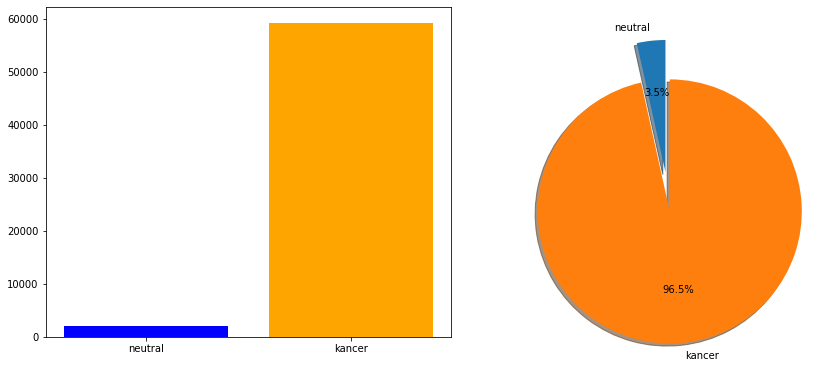

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
#plt.subplots_adjust(wspace = 0.5)
ax1.bar(y_train.unique(),y_train.value_counts(),color = ['orange','blue'],width = 0.8)
ax1.set_xticks(y_train.unique())
ax1.set_xticklabels(('kancer','neutral'))
ax2.pie((y_train.value_counts()[0],y_train.value_counts()[1]), labels = ('neutral','kancer'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])
plt.show()

In [16]:
import tensorflow as tf

Formiranje modela. Svi modeli su prvobitno ispitani preko validacionog skupa radi ispitivanja parametara.

In [18]:
import imblearn

Using TensorFlow backend.


In [19]:
from imblearn.pipeline import Pipeline

In [20]:
osPCA = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.2)
X_train_pca_resampled_os, y_train_pca_resampled_os = osPCA.fit_resample(X_train_pca, y_train)

In [21]:
usPCA = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2)
X_train_pca_resampled_us, y_train_pca_resampled_us = usPCA.fit_resample(X_train_pca, y_train)

In [22]:
osPCAp = imblearn.over_sampling.SMOTE(sampling_strategy=0.2)
usPCAp = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2)
pipelineP = Pipeline(steps=[('o', osPCAp), ('u', usPCAp)])
X_train_pca_resampled_comb, y_train_pca_resampled_comb = pipelineP.fit_resample(X_train_pca, y_train)

Model logisticke regresije sa nebalansiranim podacima.

In [13]:
import sklearn

In [100]:
modelLinear = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0, C=1, penalty="elasticnet", solver="saga", l1_ratio=0.5, class_weight="balanced")

In [101]:
modelLinear.fit(X_train_pca, y_train)
y_pred = modelLinear.predict(X_val_pca)

In [102]:
y_predTrain = modelLinear.predict(X_train_pca)

In [86]:
metrics.accuracy_score(y_test, y_pred)

0.9651720542231491

In [103]:
metrics.balanced_accuracy_score(y_val, y_pred)

0.5178024009488477

In [90]:
metrics.recall_score(y_test, y_pred)

1.0

In [91]:
metrics.precision_score(y_test, y_pred)

0.9651720542231491

In [92]:
metrics.roc_auc_score(y_test, y_pred)

0.5

In [106]:
metrics.confusion_matrix(y_val, y_pred)

array([[ 232,  302],
       [5907, 8903]])

In [104]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5766172956271279

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

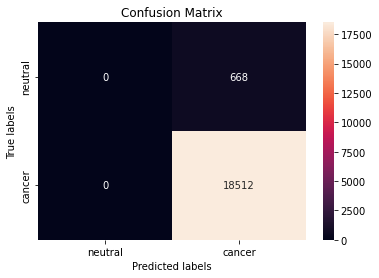

In [89]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Model logisticke regresije ucen balansiranim podacima oversampler-om.

In [94]:
modelLinearOs = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0)

In [95]:
modelLinearOs.fit(X_train_pca_resampled_os, y_train_pca_resampled_os)
y_pred = modelLinearOs.predict(X_val_pca)

In [66]:
y_predTrain = modelLinearOs.predict(X_train_pca)

In [619]:
metrics.accuracy_score(y_test, y_pred)

0.9631908237747654

In [96]:
metrics.balanced_accuracy_score(y_val, y_pred)

0.499966239027684

In [621]:
metrics.recall_score(y_test, y_pred)

0.9978932584269663

In [622]:
metrics.precision_score(y_test, y_pred)

0.9651515151515152

In [623]:
metrics.roc_auc_score(y_test, y_pred)

0.4996951322074951

In [97]:
metrics.confusion_matrix(y_test, y_pred)

array([[    0,   534],
       [    1, 14809]])

In [419]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5033103618914885

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

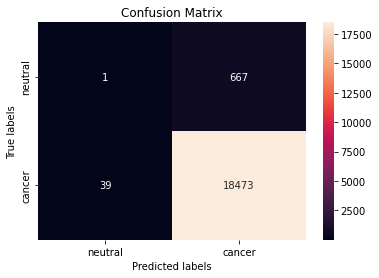

In [625]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Model logisticke regresije ucen podacima balansiranim undersampler-om.

In [420]:
modelLinearUs = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0)

In [421]:
modelLinearUs.fit(X_train_pca_resampled_us, y_train_pca_resampled_us)
y_pred = modelLinearUs.predict(X_test_pca)

In [422]:
y_predTrain = modelLinearUs.predict(X_train_pca)

In [227]:
metrics.accuracy_score(y_test, y_pred)

0.960948905109489

In [228]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.4985337233915919

In [229]:
metrics.recall_score(y_test, y_pred)

0.9955704407951599

In [230]:
metrics.precision_score(y_test, y_pred)

0.9650730481227418

In [231]:
metrics.roc_auc_score(y_test, y_pred)

0.4985337233915919

In [232]:
metrics.confusion_matrix(y_test, y_pred)

array([[    1,   667],
       [   82, 18430]])

In [423]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.504978203415568

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

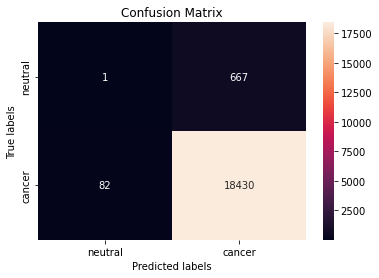

In [233]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Model logisticke regresije ucen balansiranim podacima kombinovanjem metoda oversampler-a i undersampler-a.

In [424]:
modelLinearComb = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0)

In [425]:
modelLinearComb.fit(X_train_pca_resampled_comb, y_train_pca_resampled_comb)
y_pred = modelLinearComb.predict(X_test_pca)

In [426]:
y_predTrain = modelLinearComb.predict(X_train_pca)

In [236]:
metrics.accuracy_score(y_test, y_pred)

0.9635557872784151

In [237]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.501327185732252

In [241]:
metrics.recall_score(y_test, y_pred)

0.9981633535004322

In [242]:
metrics.precision_score(y_test, y_pred)

0.9652614532727368

In [240]:
metrics.roc_auc_score(y_test, y_pred)

0.501327185732252

In [239]:
metrics.confusion_matrix(y_test, y_pred)

array([[    3,   665],
       [   34, 18478]])

In [427]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5032788487478482

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

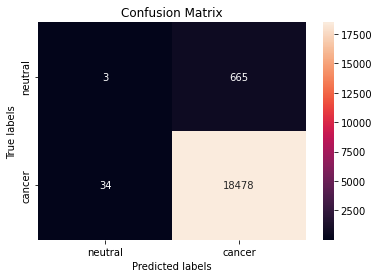

In [243]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Logisticka regresija sa podesavanjem težine klasa.

In [312]:
modelLinearW = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0, class_weight="balanced")

In [313]:
modelLinearW.fit(X_train_pca, y_train)
y_pred = modelLinearW.predict(X_test_pca)

In [314]:
y_predTrain = modelLinearW.predict(X_train_pca)

In [318]:
metrics.accuracy_score(y_test, y_pred)

0.5942127215849844

In [319]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5033520901153613

In [320]:
metrics.recall_score(y_test, y_pred)

0.6010155574762316

In [321]:
metrics.precision_score(y_test, y_pred)

0.9655471665364922

In [322]:
metrics.f1_score(y_test, y_pred)

0.7408689861827866

In [323]:
metrics.roc_auc_score(y_test, y_pred)

0.5033520901153613

In [317]:
metrics.confusion_matrix(y_test, y_pred)

array([[  271,   397],
       [ 7386, 11126]])

In [316]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.579647982814237

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

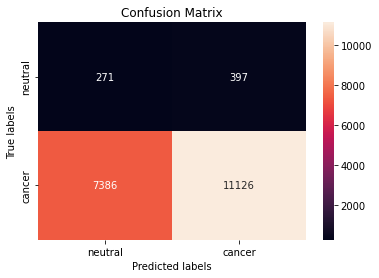

In [324]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Logisticka regresija sa podacima posle primene oversampler-a i sa podešavanjem težine klasa.

In [432]:
modelLinearCW = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0, class_weight="balanced")

In [433]:
osL = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.2)
X_train_resampled_osl, y_train_resampled_osl = osL.fit_resample(X_train_pca, y_train)

In [434]:
modelLinearCW.fit(X_train_resampled_osl, y_train_resampled_osl)
y_pred = modelLinearCW.predict(X_test_pca)

In [435]:
y_predTrain = modelLinearCW.predict(X_train_pca)

In [150]:
metrics.accuracy_score(y_test, y_pred)

0.5976538060479666

In [151]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5087421850335629

In [152]:
metrics.recall_score(y_test, y_pred)

0.6043107173725151

In [153]:
metrics.precision_score(y_test, y_pred)

0.9661456084290526

In [154]:
metrics.f1_score(y_test, y_pred)

0.7435445814363099

In [155]:
metrics.roc_auc_score(y_test, y_pred)

0.5087421850335629

In [156]:
metrics.confusion_matrix(y_test, y_pred)

array([[  276,   392],
       [ 7325, 11187]])

In [436]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5706380411464687

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

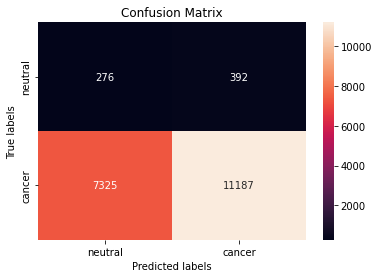

In [157]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Proces formiranja finalnog modela.

In [34]:
y_final = database['Class']
X_final = database.drop(columns=['Class', 'variation', 'Gene name'])

In [35]:
scalerFinal = preprocessing.StandardScaler()
scalerFinal.fit(X_final)
X_final = scalerFinal.transform(X_final)

In [36]:
pcaFinal = PCA(n_components=300)

In [37]:
pcaFinal.fit(X_final, y_final)

PCA(n_components=300)

In [38]:
X_final_pca = pcaFinal.transform(X_final)

Cuvanje modela.

In [42]:
import pickle

In [26]:
from pickle import dump

In [30]:
osLF = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.2)
X_final_resampled_oslF, y_final_resampled_oslF = osLF.fit_resample(X_final_pca, y_final)
modelLinearCWFinal = sklearn.linear_model.LogisticRegression(max_iter=1000, random_state=0, class_weight="balanced")
modelLinearCWFinal.fit(X_final_resampled_oslF, y_final_resampled_oslF)

with open("LogisticRegressionModel/model", "wb") as f:
    pickle.dump(modelLinearCWFinal , f)